In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters, measure
from skimage.filters import gaussian

def max_pooling(image, pool_size):
    """Applies max pooling with a given pool size."""
    return measure.block_reduce(image, block_size=(pool_size, pool_size), func=np.max)

def detect_edges_with_pooling(image_path, sigma=1.0, max_pools=3):
    # Load image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Apply Gaussian blur for smooth edges
    smooth_image = gaussian(gray_image, sigma=sigma)

    # Apply Sobel edge detection
    edge_image = filters.sobel(smooth_image)
    
    # Normalize for visualization
    edge_image = (edge_image / edge_image.max() * 255).astype(np.uint8)

    # Create a grid of subplots
    fig, axes = plt.subplots(1, max_pools + 1, figsize=(15, 5))

    # Original edge-detected image
    axes[0].imshow(edge_image, cmap="gray")
    axes[0].set_title("Original Edges")

    pooled_image = edge_image  # Start with original edge-detected image

    # Apply max pooling multiple times
    for i in range(1, max_pools + 1):
        pooled_image = max_pooling(pooled_image, pool_size=2)  # Reduce by 2x2 pooling
        axes[i].imshow(pooled_image, cmap="gray")
        axes[i].set_title(f"Pooling {i}")

    # Hide axis
    for ax in axes:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage:
# detect_edges_with_pooling("path/to/your/image.jpg", sigma=1.5, max_pools=4)


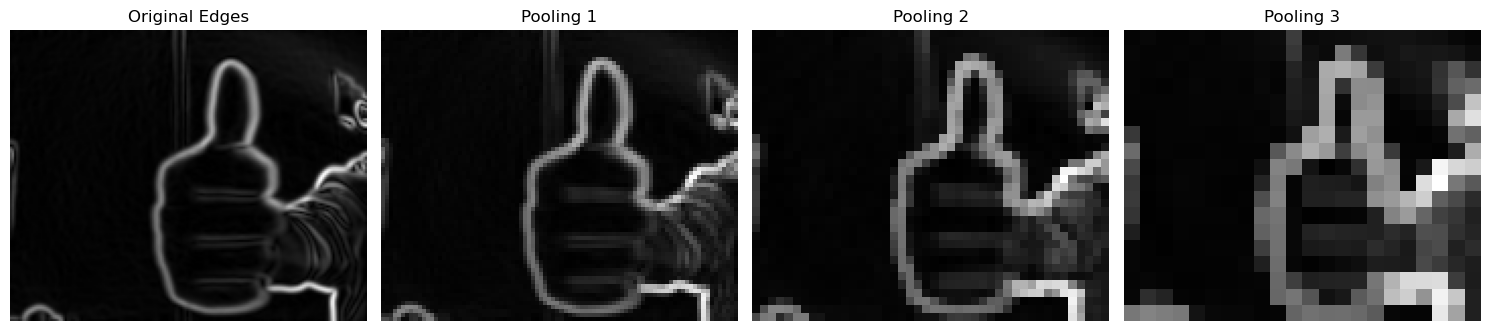

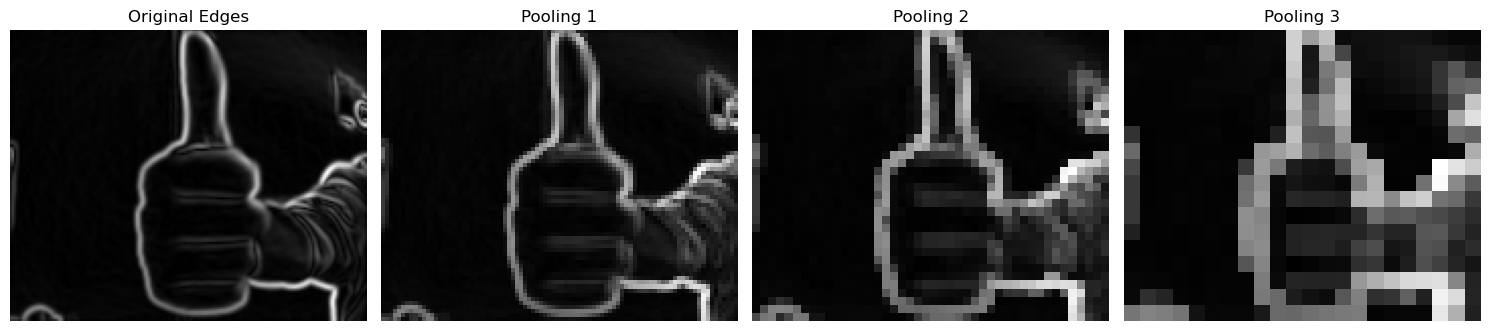

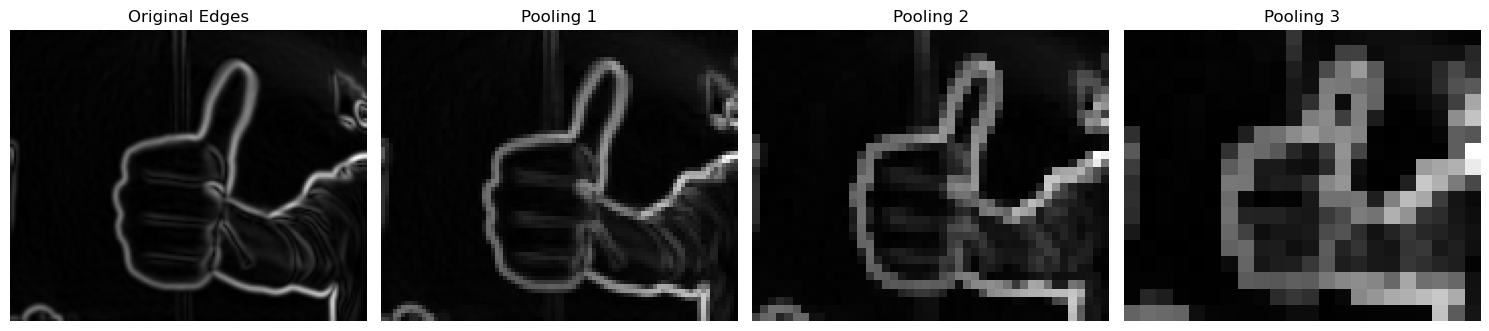

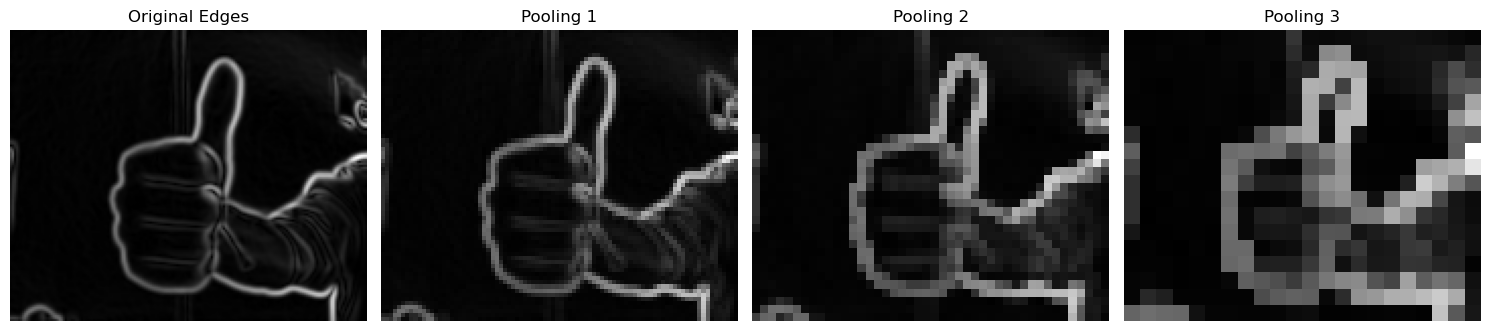

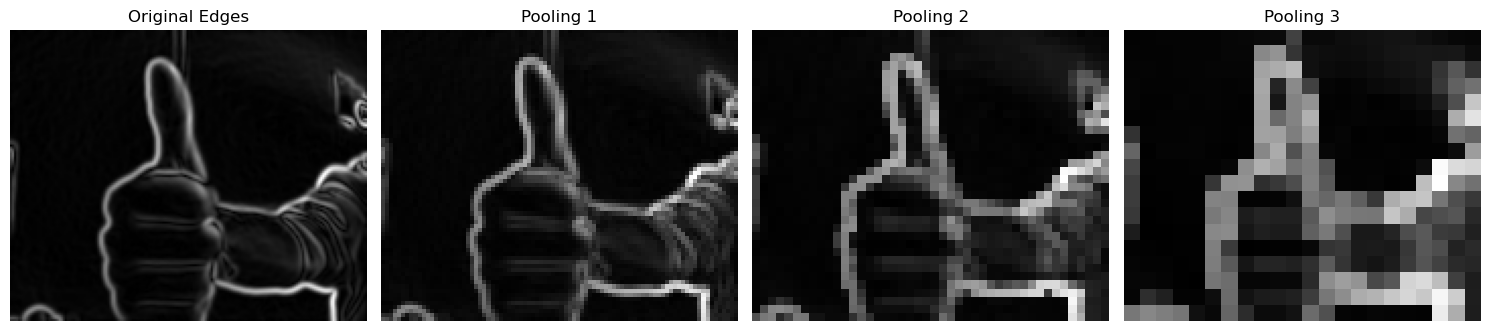

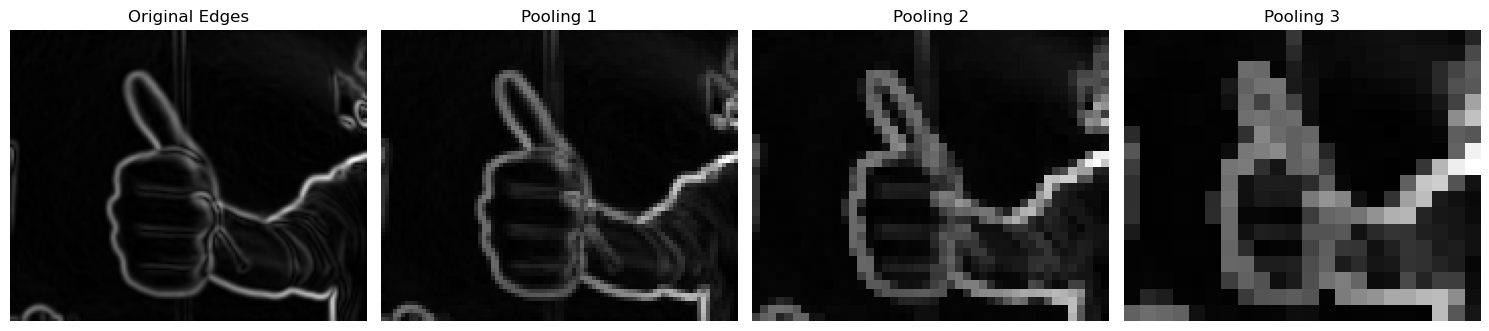

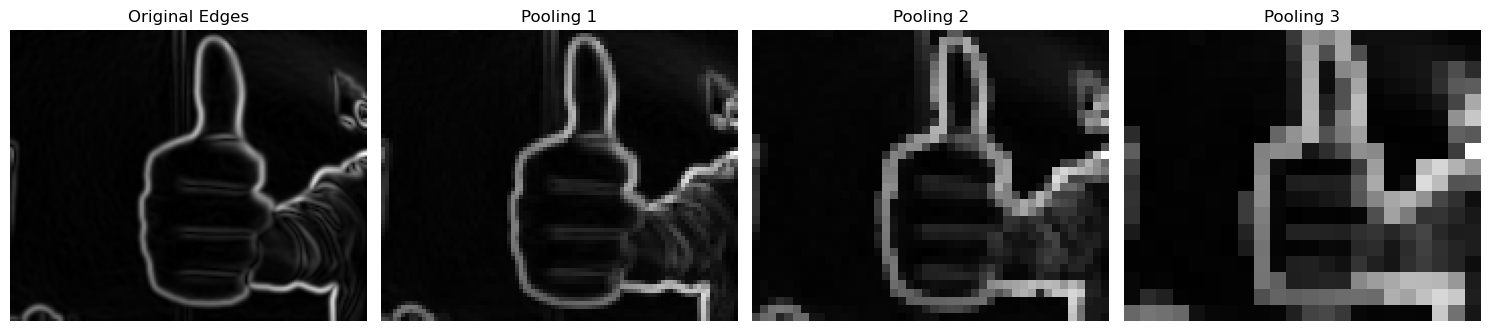

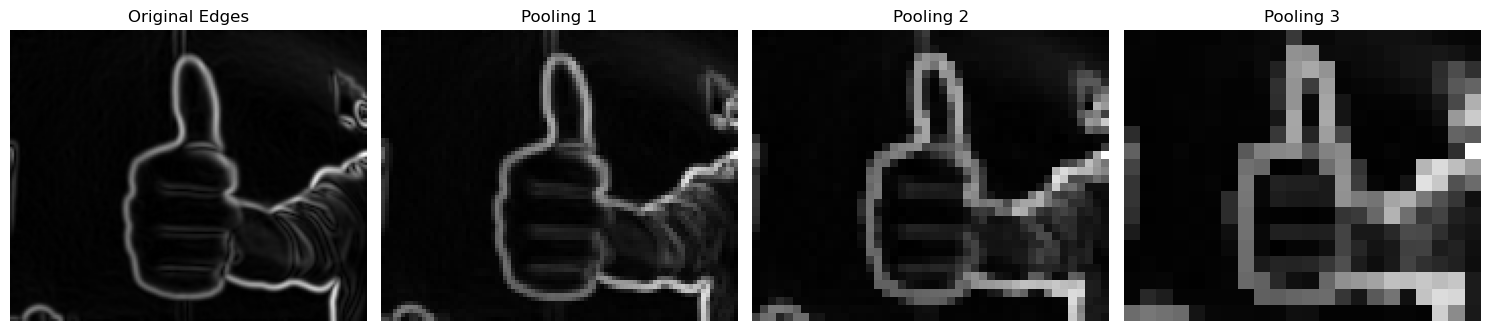

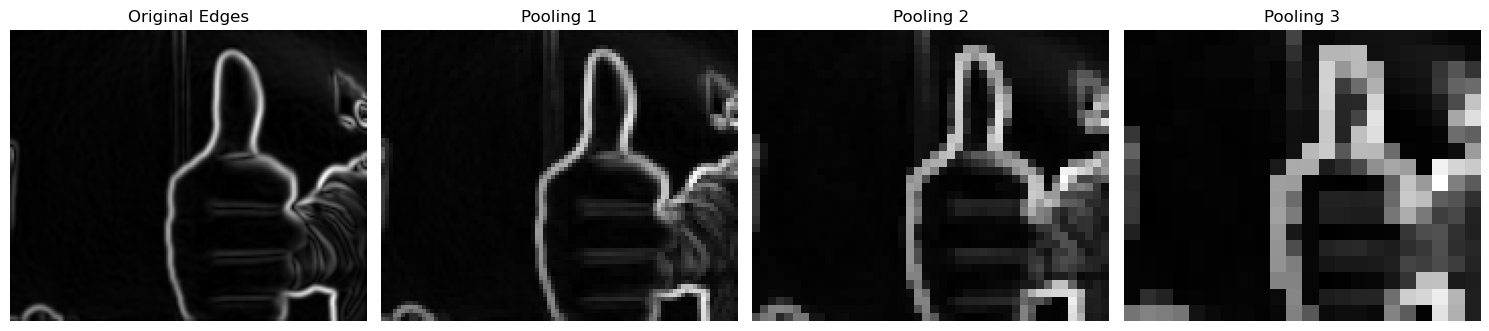

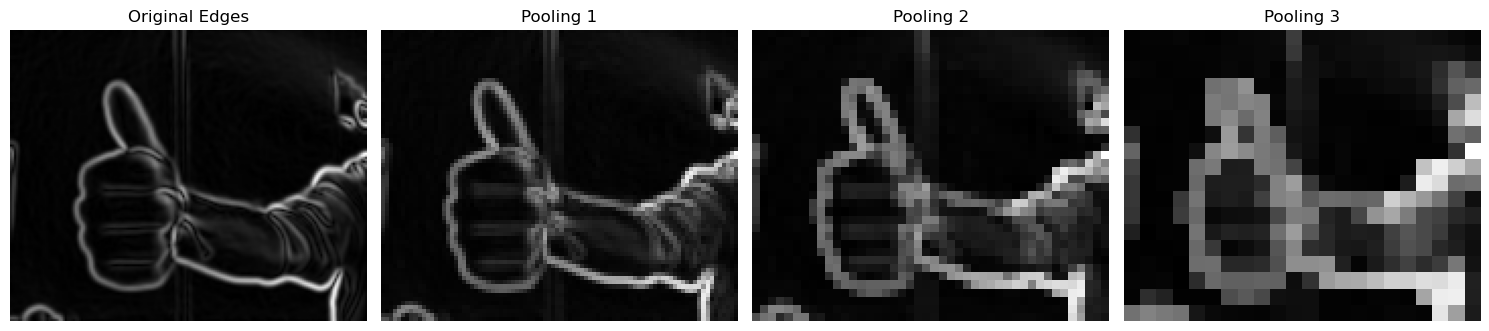

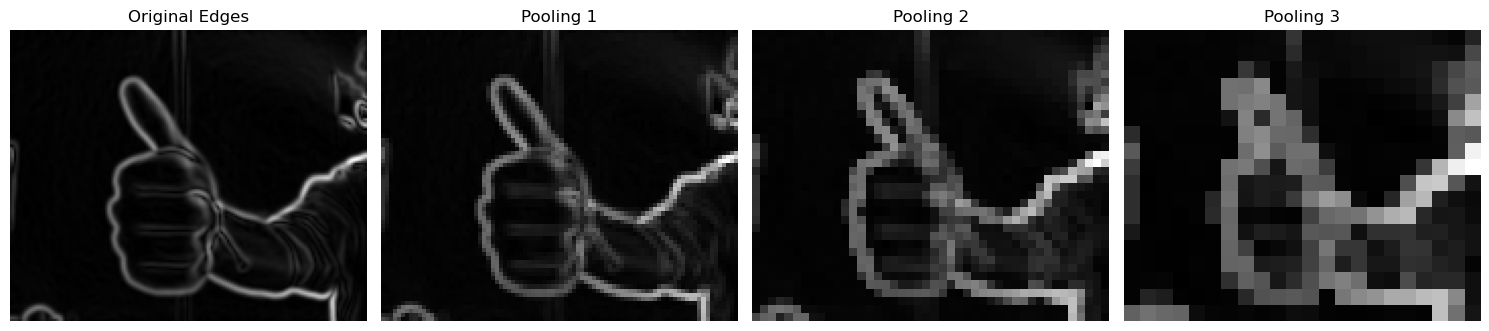

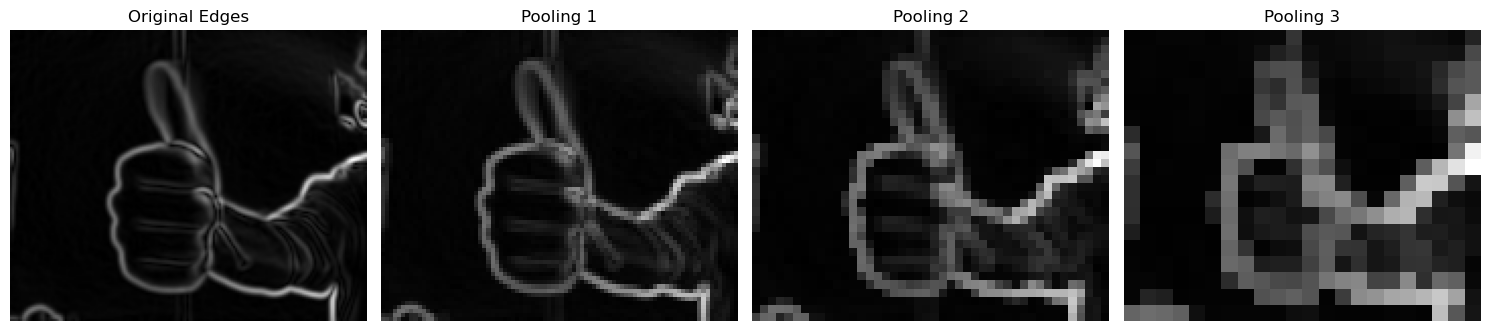

In [4]:
from os import listdir
from os.path import join

folder = 'thumbs_up'
files = [join(folder, f) for f in listdir(folder) if f.endswith('jpg')]
# Example usage
img_path = "/mnt/c/Users/Luis/Pictures/Camera Roll/WIN_20250206_18_59_27_Pro.jpg"
#detect_edges_with_pooling(img_path)
for file in files:
    detect_edges_with_pooling(file)

In [1]:
import cv2
import numpy as np
from skimage.filters import sobel

def detect_thumbs_up(image_path):
    # Load the image and convert to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection (Sobel filter)
    edges = sobel(gray)
    edges = (edges * 255).astype(np.uint8)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through contours to find the largest one (likely the hand)
    max_contour = max(contours, key=cv2.contourArea) if contours else None

    if max_contour is not None:
        # Convex hull to approximate hand shape
        hull = cv2.convexHull(max_contour)

        # Find convexity defects (between fingers)
        hull_indices = cv2.convexHull(max_contour, returnPoints=False)
        defects = cv2.convexityDefects(max_contour, hull_indices)

        # Count the number of defects (spaces between fingers)
        if defects is not None:
            defect_count = 0
            for i in range(defects.shape[0]):
                _, _, far_idx, depth = defects[i, 0]
                if depth > 1000:  # Adjust this threshold
                    defect_count += 1

            # Criteria for thumbs-up:
            # - 1 or 2 convexity defects (one between thumb and hand)
            # - Hand size is significant
            if defect_count <= 2 and cv2.contourArea(max_contour) > 5000:
                print("Thumbs Up Detected!")
                cv2.drawContours(image, [hull], -1, (0, 255, 0), 3)
            else:
                print("No Thumbs Up Detected")

        # Draw contours for visualization
        cv2.drawContours(image, [max_contour], -1, (255, 0, 0), 2)

    # Show results
    cv2.imshow("Edges", edges)
    cv2.imshow("Detected Hand", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage:
# detect_thumbs_up("path/to/your/image.jpg")


In [ ]:
from os import listdir
from os.path import join
folder = '1280x720'
files = [join(folder, f) for f in listdir('.') if f.endswith('jpg')]

for file in files:
    detect_thumbs_up(file)

No Thumbs Up Detected


QObject::moveToThread: Current thread (0x328e8c20) is not the object's thread (0x3328dcf0).
Cannot move to target thread (0x328e8c20)

QObject::moveToThread: Current thread (0x328e8c20) is not the object's thread (0x3328dcf0).
Cannot move to target thread (0x328e8c20)

QObject::moveToThread: Current thread (0x328e8c20) is not the object's thread (0x3328dcf0).
Cannot move to target thread (0x328e8c20)

QObject::moveToThread: Current thread (0x328e8c20) is not the object's thread (0x3328dcf0).
Cannot move to target thread (0x328e8c20)

QObject::moveToThread: Current thread (0x328e8c20) is not the object's thread (0x3328dcf0).
Cannot move to target thread (0x328e8c20)

QObject::moveToThread: Current thread (0x328e8c20) is not the object's thread (0x3328dcf0).
Cannot move to target thread (0x328e8c20)

QObject::moveToThread: Current thread (0x328e8c20) is not the object's thread (0x3328dcf0).
Cannot move to target thread (0x328e8c20)

QObject::moveToThread: Current thread (0x328e8c20) is n

In [1]:
import cv2
import numpy as np
from skimage import color, filters
from collections import deque

def detect_edges_video(video_path, n_frames=5):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    prev_edges_buffer = deque(maxlen=n_frames)  # Store the last N edge-detected frames

    while True:
        ret, frame = cap.read()

        if not ret:
            # Reset video to the beginning when it reaches the end
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            prev_edges_buffer.clear()  # Reset buffer
            continue

        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply edge detection
        edge_frame = filters.sobel(gray_frame)

        if len(prev_edges_buffer) == n_frames:
            # Compute the average of the last N edge frames
            avg_prev_edges = np.mean(prev_edges_buffer, axis=0)

            # Highlight changes by taking the absolute difference
            movement = np.abs(edge_frame - avg_prev_edges) * 255  # Scale for display
            movement = movement.astype(np.uint8)

            cv2.imshow("Movement Detection", movement)

        # Store the current edge frame in the buffer
        prev_edges_buffer.append(edge_frame)

        # Break if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage:
# detect_edges_video("path/to/your/video.mp4", n_frames=5)


In [2]:

# Example usage:
vid_path = "/mnt/c/Users/Luis/Pictures/Camera Roll/WIN_20250206_17_45_57_Pro.mp4"
detect_edges_video(vid_path)


QObject::moveToThread: Current thread (0x1bb38b20) is not the object's thread (0x1da6c610).
Cannot move to target thread (0x1bb38b20)

QObject::moveToThread: Current thread (0x1bb38b20) is not the object's thread (0x1da6c610).
Cannot move to target thread (0x1bb38b20)

QObject::moveToThread: Current thread (0x1bb38b20) is not the object's thread (0x1da6c610).
Cannot move to target thread (0x1bb38b20)

QObject::moveToThread: Current thread (0x1bb38b20) is not the object's thread (0x1da6c610).
Cannot move to target thread (0x1bb38b20)

QObject::moveToThread: Current thread (0x1bb38b20) is not the object's thread (0x1da6c610).
Cannot move to target thread (0x1bb38b20)

QObject::moveToThread: Current thread (0x1bb38b20) is not the object's thread (0x1da6c610).
Cannot move to target thread (0x1bb38b20)

QObject::moveToThread: Current thread (0x1bb38b20) is not the object's thread (0x1da6c610).
Cannot move to target thread (0x1bb38b20)

QObject::moveToThread: Current thread (0x1bb38b20) is n